# $\text{AR}(1)$ with Offset

$\text{AR}(1)$ with a constant offset is defined by,

$
\begin{align}
X_t = \varphi X_{t-1} + \mu^* + \sigma \varepsilon_t
\end{align}
$

where, $\varepsilon \sim \text{Normal}(0,1)$

The stationarity requires $\lvert \varphi \rvert < 1$. The stationary mean and variance are given by,

$
\begin{align}
&\lim_{t \to \infty} \text{E}(X_t) = \frac{\mu^*}{1 - \varphi} \\
&\lim_{t \to \infty} \text{Var}(X_t) = \frac{\sigma^2}{1 - \varphi^2}
\end{align}
$

It follows that $X_t$ has distribution,

$
\begin{align}
X_t \sim \text{Normal}\left(  \frac{\mu}{1 - \varphi} ,  \frac{\sigma^2}{1 - \varphi^2} \right)
\end{align}
$


## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib import (DataType, DataSchema, DataFunc, SourceType, DataSource, perform_est, EstType)
from lib import (stack, FuncPlotType, fpoints, fcurve, curve)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
σ = 1.0
nsample = 1000

def cumu_mean_plot(φ, σ, μ, nsample):
    ar = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], σ=σ, μ=μ, xmax=nsample)
    ar = DataFunc.apply_func_type(ar, DataType.CUMU_MEAN)
    ar = DataFunc.apply_func_type(ar, DataType.AR1_OFFSET_MEAN, φ=φ, μ=μ)
    fcurve(ar, FuncPlotType.AR1_CUMU_OFFSET_MEAN, title_offset=1.025)
    
def cumu_sd_plot(φ, σ, μ, nsample):
    ar = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], σ=σ, μ=μ, xmax=nsample)
    ar = DataFunc.apply_func_type(ar, DataType.CUMU_SD)
    ar = DataFunc.apply_func_type(ar, DataType.AR1_OFFSET_SD, φ=φ, σ=σ)
    fcurve(ar, FuncPlotType.AR1_CUMU_OFFSET_SD, title_offset=1.025)
    
def comparison_plot_μ(μ_vals, ylim, title, *params):
    labels = [r"$μ^*=$" + f"{val}" for val in μ_vals]
    scan = DataSource.create_parameter_scan(SourceType.AR_OFFSET, *params)
    stack(scan, ylim=ylim, title=title, labels=labels, data_type=DataType.TIME_SERIES)
    
def comparison_plot_φ(φ_vals, ylim, title, *params):
    labels = [f"φ={val}" for val in φ_vals] 
    scan = DataSource.create_parameter_scan(SourceType.AR_OFFSET, *params)
    stack(scan, ylim=ylim, title=title, labels=labels, data_type=DataType.TIME_SERIES)

## Simulation $\varphi$ Scan

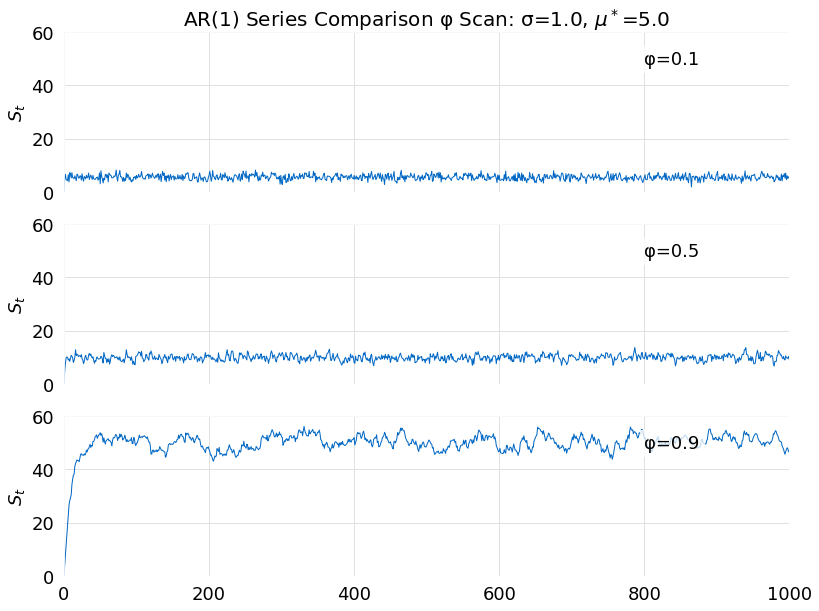

In [3]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ_vals = [0.1, 0.5, 0.9]
params = [{"φ": [φ], "σ": σ, "μ": μ, "xmax": nsample} for φ in φ_vals]
comparison_plot_φ(φ_vals, [0.0, 60.0], title, *params)

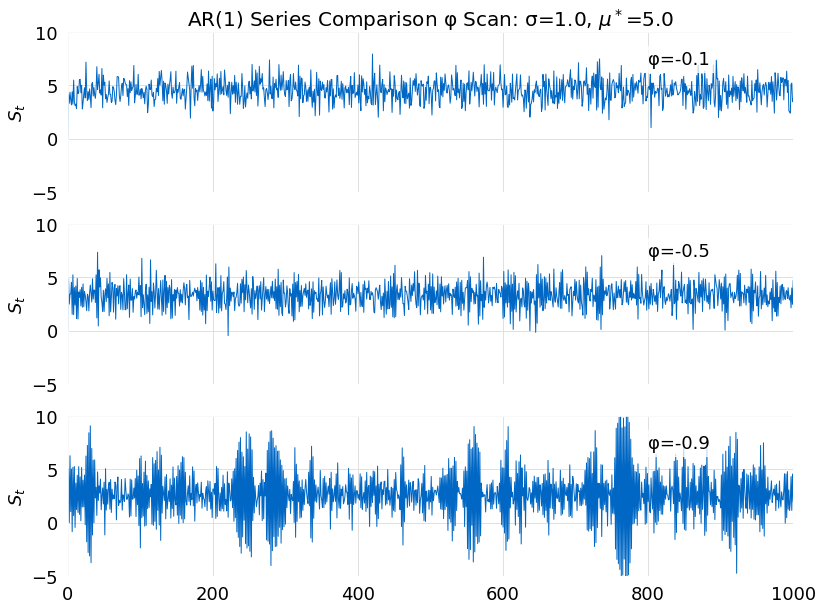

In [4]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ_vals = [-0.1, -0.5, -0.9]
params = [{"φ": [φ], "σ": σ, "μ": μ, "xmax": nsample} for φ in φ_vals]
comparison_plot_φ(φ_vals, [-5.0, 10.0], title, *params)

## Simulation $\mu^*$ Scan

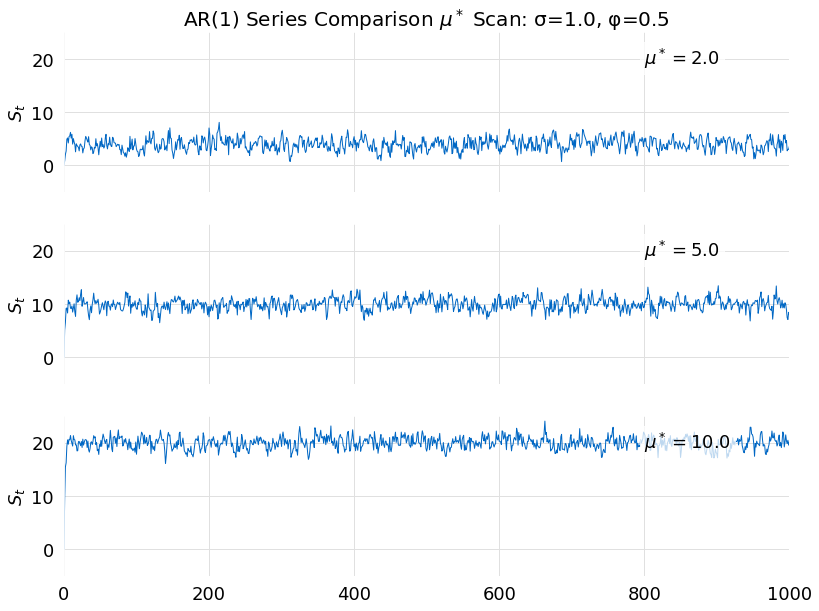

In [5]:
φ = 0.5
title = f"AR(1) Series Comparison " + r"$\mu^*$" + f" Scan: σ={σ}, φ={φ}"
μ_vals = [2.0, 5.0, 10.0]
params = [{"φ": [φ], "σ": σ, "μ": μ, "xmax": nsample} for μ in μ_vals]
comparison_plot_μ(μ_vals, [-5.0, 25.0], title, *params)

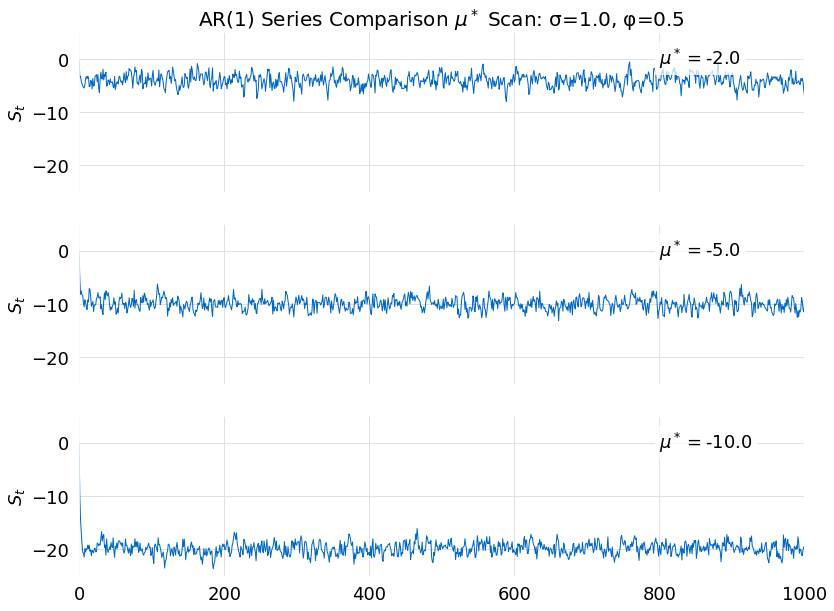

In [6]:
title = f"AR(1) Series Comparison " + r"$\mu^*$" + f" Scan: σ={σ}, φ={φ}"
μ_vals = [-2.0, -5.0, -10.0]
params = [{"φ": [φ], "σ": σ, "μ": μ, "xmax": nsample} for μ in μ_vals]
comparison_plot_μ(μ_vals, [-25.0, 5.0], title, *params)

## Mean

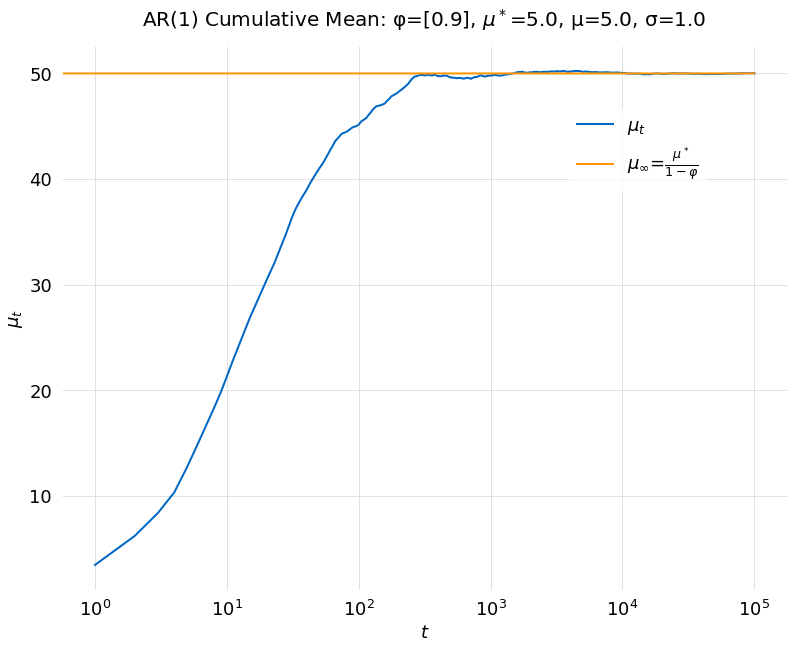

In [7]:
φ = 0.9
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

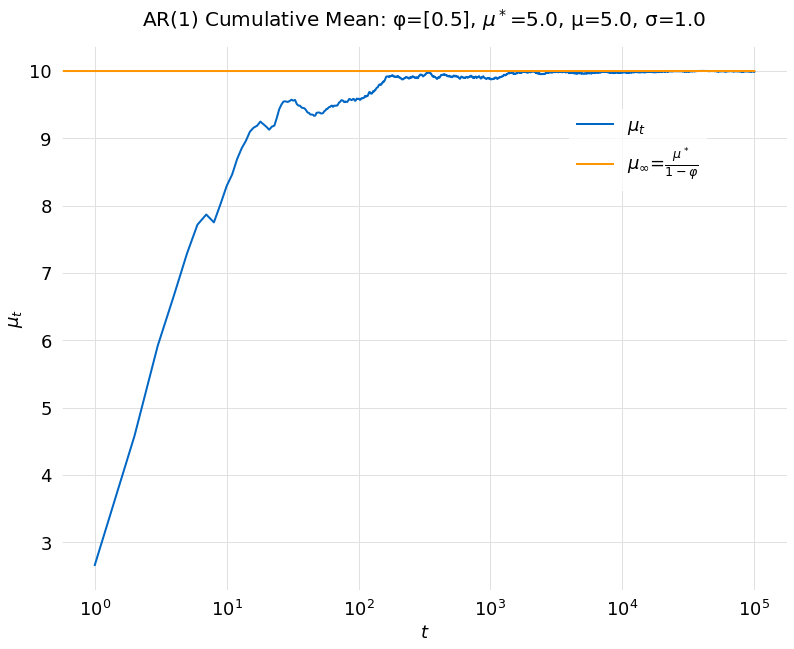

In [8]:
φ = 0.5
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

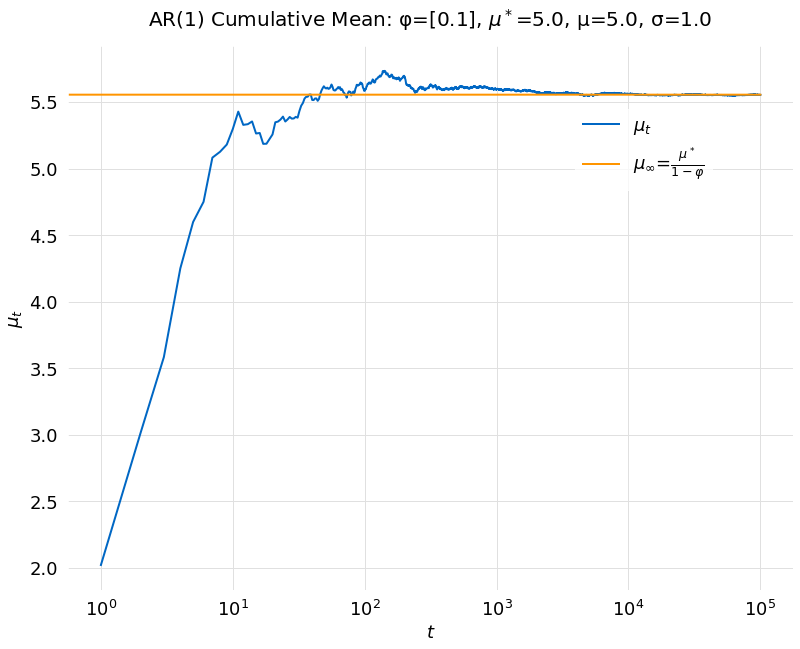

In [9]:
φ = 0.1
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

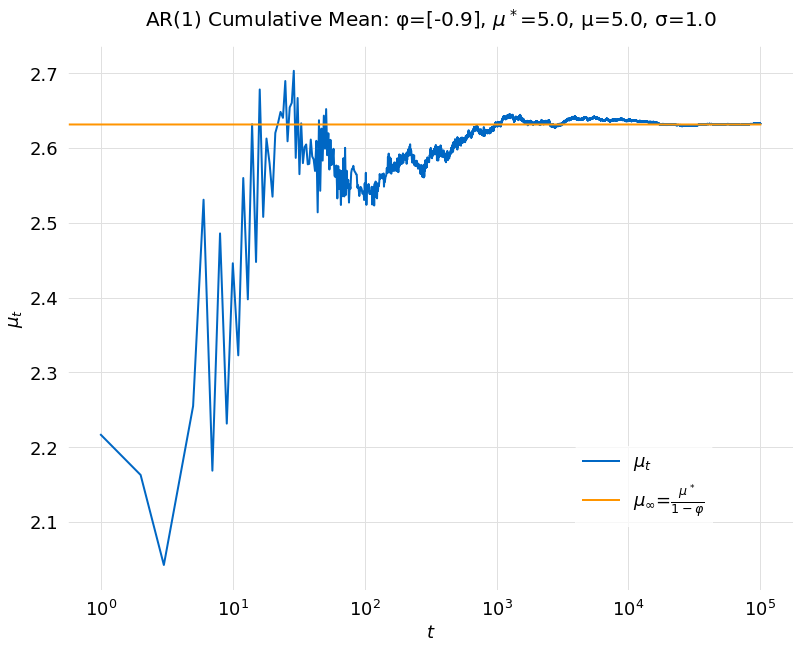

In [10]:
φ = -0.9
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

## Standard Deviation

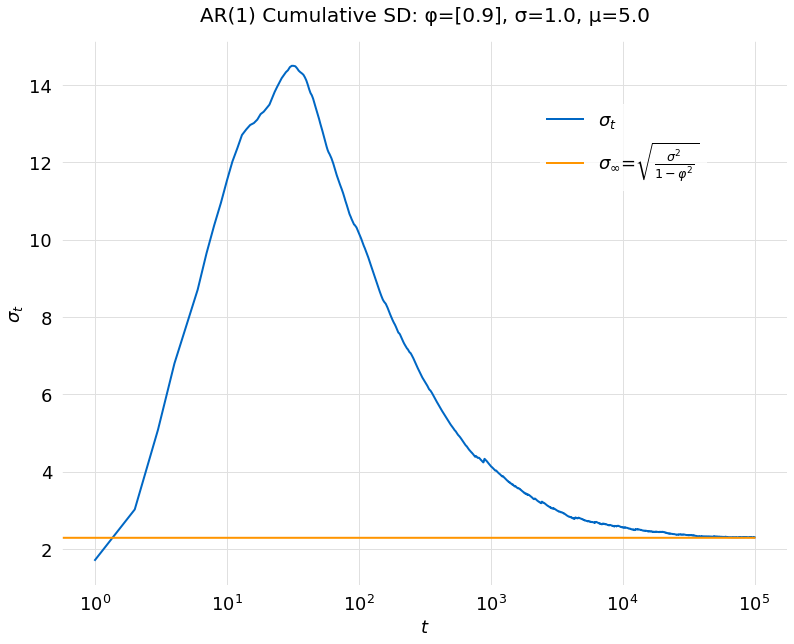

In [11]:
φ = 0.9
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

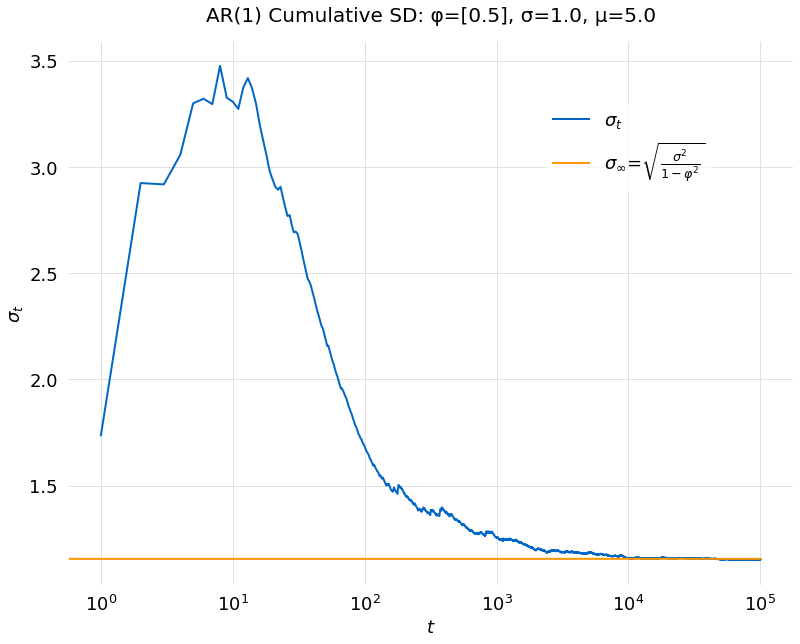

In [12]:
φ = 0.5
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

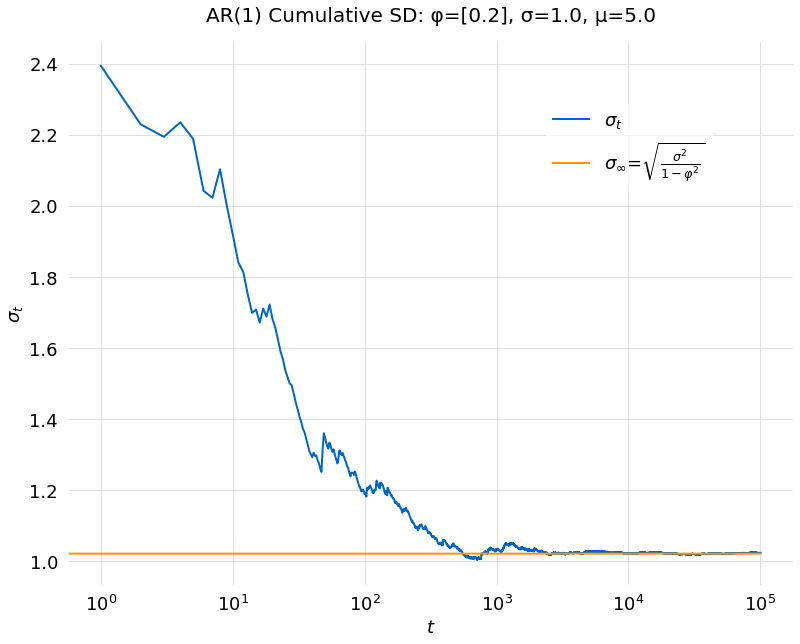

In [13]:
φ = 0.2
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

## Parameter Estimation

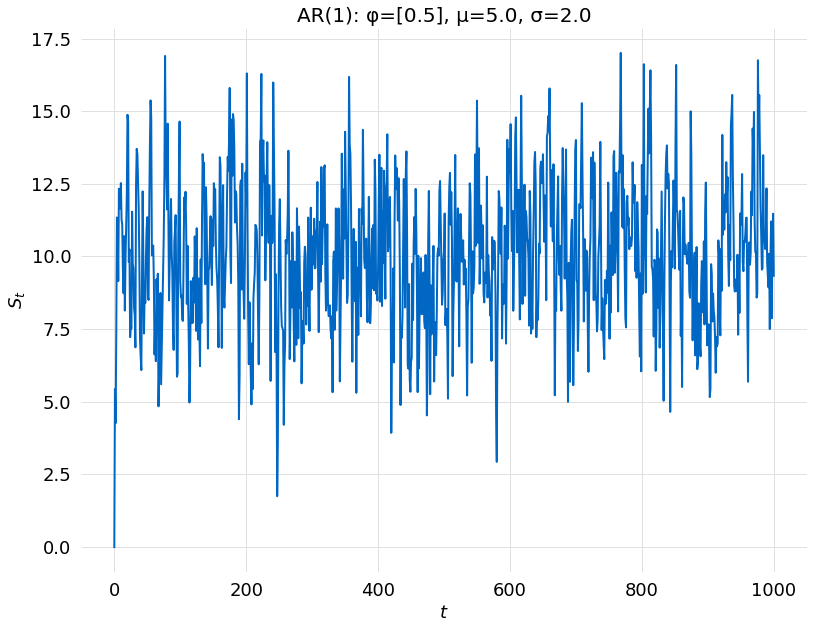

In [14]:
φ = 0.5
μ = 5.0
σ = 2.0
nsample = 1000
df = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], μ=μ, σ=σ, xmax=nsample)
curve(df, data_type=DataType.TIME_SERIES)

In [15]:
results = perform_est(df, EstType.AR_OFFSET, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2136.589
Date:                Mon, 16 May 2022   AIC                           4279.179
Time:                        08:24:38   BIC                           4293.905
Sample:                             0   HQIC                          4284.776
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0300      0.138     72.894      0.000       9.760      10.300
ar.L1          0.5374      0.027     19.895      0.000       0.484       0.590
sigma2         4.1815      0.183     22.876      0.000       3.823       4.540
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.89
Prob(Q):                              0.72   Prob(JB):                         0.64
Heteroskedasticity (H):               0.94   Skew:                             0.01
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
df.attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.5], 'μ': 5.0, 'σ': 2.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR_OFFSET(1)': {'Type': <EstType.AR_OFFSET: 'AR_OFFSET'>,
    'Const': [10.029978530666472, 0.13759655643250845],
    'Parameters': [[0.5373931047455957, 0.027011312405789904]],
    'Sigma2': [4.181546057231293, 0.1827950110397764]}},
  'Tests': {}},
 'Date': '16/05/2022 08:24:38',
 'Name': 'AR(1)-Simulation-250a6656-7627-4317-9ea0-dca24840973a'}

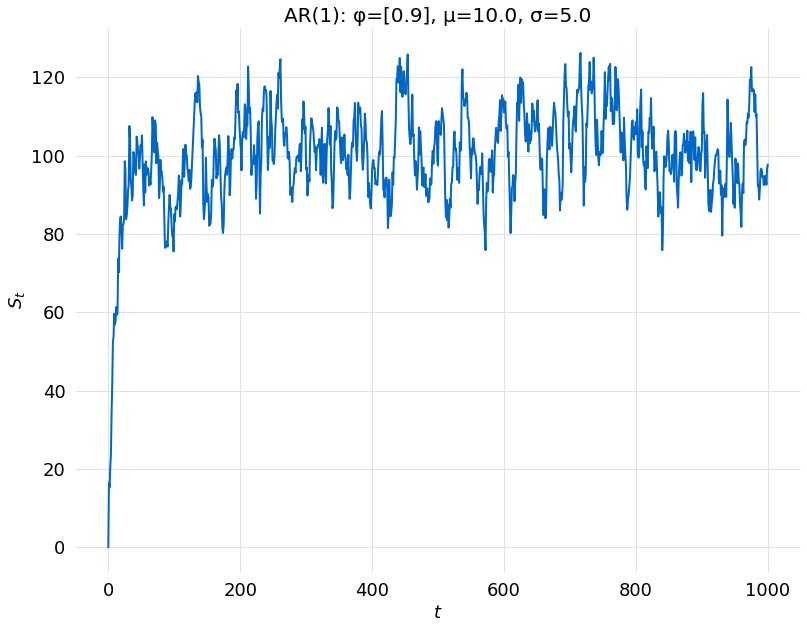

In [17]:
φ = 0.9
μ = 10.0
σ = 5.0
nsample = 1000
df = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], μ=μ, σ=σ, xmax=nsample)
curve(df, data_type=DataType.TIME_SERIES)

In [18]:
results = perform_est(df, EstType.AR_OFFSET, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3042.033
Date:                Mon, 16 May 2022   AIC                           6090.067
Time:                        08:24:38   BIC                           6104.793
Sample:                             0   HQIC                          6095.664
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.3920      2.737     35.945      0.000      93.027     103.757
ar.L1          0.9439      0.005    209.442      0.000       0.935       0.953
sigma2        25.4799      1.047     24.327      0.000      23.427      27.533
===================================================================================
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):               136.80
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.24
Prob(H) (two-sided):                  0.51   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
df.attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.9], 'μ': 10.0, 'σ': 5.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR_OFFSET(1)': {'Type': <EstType.AR_OFFSET: 'AR_OFFSET'>,
    'Const': [98.3919588417114, 2.7372716639828614],
    'Parameters': [[0.9439415595494978, 0.004506939096012723]],
    'Sigma2': [25.479905057735753, 1.0473844402701449]}},
  'Tests': {}},
 'Date': '16/05/2022 08:24:38',
 'Name': 'AR(1)-Simulation-29522262-c899-4f71-8f7d-52590358de37'}

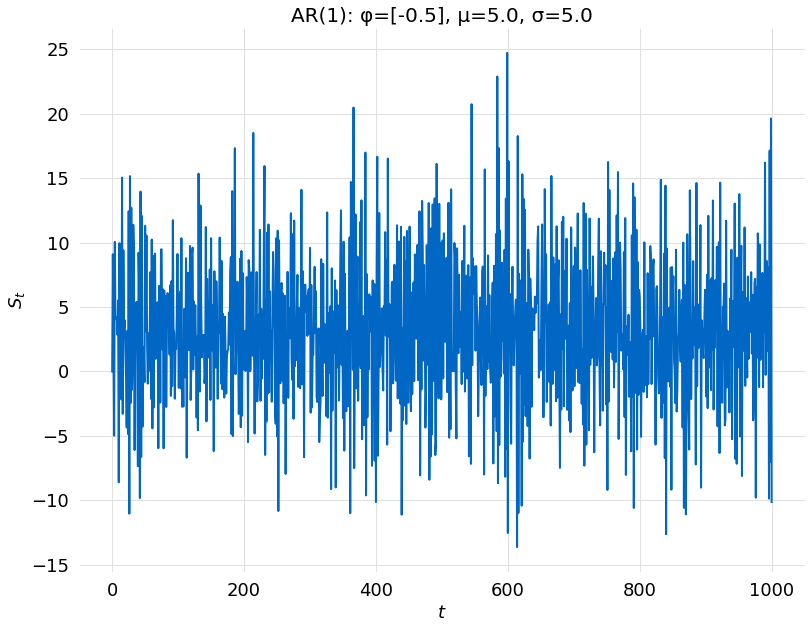

In [20]:
φ = -0.5
μ = 5.0
nsample = 1000
df = DataSource.create_source_type(SourceType.AR_OFFSET, φ=[φ], μ=μ, σ=σ, xmax=nsample)
curve(df, data_type=DataType.TIME_SERIES)

In [21]:
results = perform_est(df, EstType.AR_OFFSET, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3047.596
Date:                Mon, 16 May 2022   AIC                           6101.191
Time:                        08:24:39   BIC                           6115.918
Sample:                             0   HQIC                          6106.788
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2154      0.107     30.155      0.000       3.006       3.424
ar.L1         -0.5090      0.027    -18.748      0.000      -0.562      -0.456
sigma2        25.8146      1.153     22.394      0.000      23.555      28.074
===================================================================================
Ljung-Box (L1) (Q):                   1.25   Jarque-Bera (JB):                 1.11
Prob(Q):                              0.26   Prob(JB):                         0.57
Heteroskedasticity (H):               1.16   Skew:                             0.08
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
df.attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [-0.5], 'μ': 5.0, 'σ': 5.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR_OFFSET(1)': {'Type': <EstType.AR_OFFSET: 'AR_OFFSET'>,
    'Const': [3.2153543455922073, 0.10662930401362172],
    'Parameters': [[-0.5090497824212171, 0.027152791883790495]],
    'Sigma2': [25.814577827071695, 1.1527277886678744]}},
  'Tests': {}},
 'Date': '16/05/2022 08:24:38',
 'Name': 'AR(1)-Simulation-db7f77c9-d221-4690-8b14-9a70f2000615'}